In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sb

In [2]:
pokemon = pd.read_csv('C:/Users/Admin/Desktop/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Feauture engineering is an option when performing an investigation into our data.

I want to look at an example of biases in Pokemon creatures statistics. I want to know if a creature's offensive stats are biased towards physical or special-attack if their defensive stats are similarly biased towards physical or special defense.

To do that I will create new variables based on ratios. The `atk_ratio` column is the ratio between `attack` and `special-attack`. If a create has a value greater than one, they favored the physical side, if less than one, they favor the special sides. The same goes for the defensive statistics.

In [3]:
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

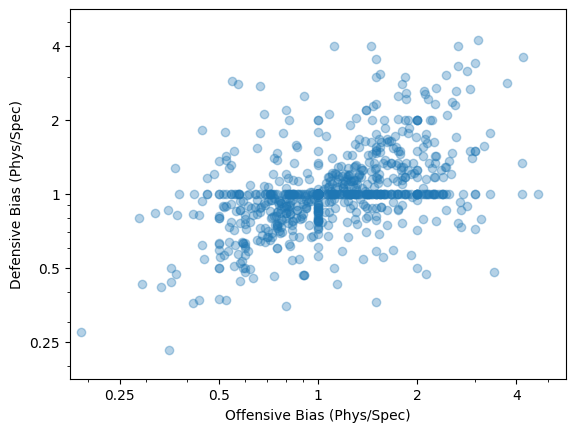

In [9]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')

plt.xscale('log')
plt.yscale('log')

# Add tick marks for approriate log scale
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc)

# Set the axis limit to remove extreme outliers
plt.xlim(2**-2.5, 2**2.5)
plt.ylim(2**-2.5, 2**2.5);